In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pendulum

We want to minimize the following discounted cost function
$$\sum_{i=0}^{\infty} \alpha^i g(x_i, u_i)$$ where 
$$g(x_i, u_i) = (\theta-\pi)^2 + 0.01 \cdot \dot{\theta}_i^2 + 0.0001 \cdot u_i^2 \qquad \textrm{and} \qquad\alpha=0.99$$

In [2]:
class Pendulum:
    def __init__(self,controls):
        self.controls = controls
        self.eta = 0.2
        self.stepSize = 0.3
        self.alpha = 0.99
        self.q_table = np.zeros([2500,3])
        self.costEpisode = []
    
    def get_cost(self,x,u):
        return (x[0]-np.pi)**2 + 0.01*(x[1])**2 + 0.0001*u**2 
    
   # Function defining the get policy and value function
    def get_policy_and_value_function(self):
        value_function = np.zeros([50,50])
        policy = np.zeros([50,50])
    
        for i in range(2500):
            value_function[int(i/50)][int(i%50)] = np.min(self.q_table[i,:])
            policy[int(i/50)][int(i%50)] = self.controls[np.argmin(self.q_table[i,:])]
        return value_function, policy

    
    def get_closest_state(self,x):
    
        discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
        discretized_omega = np.linspace(-6, 6, 50)

        theta_arbitrary = x[0]
        omega_arbitrary = x[1]

        # we can find the index of the closest element in the set of discretized states
        index_in_discretized_theta = np.argmin(np.abs(discretized_theta - theta_arbitrary))
        index_in_discretized_omega = np.argmin(np.abs(discretized_omega - omega_arbitrary))

        # and find the closed discretized state
        closest_theta_state = discretized_theta[index_in_discretized_theta]
        closest_omega_state = discretized_omega[index_in_discretized_omega]

        return index_in_discretized_theta*50 + index_in_discretized_omega

    # Defining the training 
    def episode(self):
        self.costEpisode = []
        for i in range(10000):
            cost = 0
            #s = np.random.randint(0,2500)
            #state = np.array([int(s/50)*0.12566370614359174,int(s%50)*0.24489795918367285])
            state = np.array([0,0])
            s= 0
            for i in range(100):
                probability = np.random.rand()
                if probability < self.eta:
                    action = self.controls[np.random.randint(0,3)]
                    
                else:
                    
                    action = self.controls[np.argmin(self.q_table[s,:])]
                
                uIndex = self.controls.index(action)
                currentCost = self.get_cost(state,action)
                stateN = pendulum.get_next_state(state, action)
                sN = self.get_closest_state(stateN)
                delta = currentCost+self.alpha*np.min(self.q_table[sN,:])-self.q_table[s,uIndex]
                self.q_table[s,uIndex] = self.q_table[s,uIndex] + self.stepSize*delta
                state = stateN
                s  = sN
                cost+=delta
            self.costEpisode.append(cost)
       
    def dummy_controller(self,x):
        
        sN = self.get_closest_state(x)
        u = self.controls[np.argmin(self.q_table[sN,:])]
        return u        

    def plots(self):
        T = 10.
        x0 = np.array([0,0.])
        t, x, u = pendulum.simulate(x0, qp.dummy_controller, T)
        # we can plot the results
        plt.figure()

        plt.subplot(2,1,1)
        plt.plot(t, x[0,:])
        plt.legend(['theta'])

        plt.subplot(2,1,2)
        plt.plot(t, x[1,:])
        plt.legend(['omega'])

        # we can also plot the control
        plt.figure()
        plt.plot(t[:-1], u.T)
        plt.legend(['u1'])
        plt.xlabel('Time [s]')
        
        value_function = np.zeros([50,50])
        policy = np.zeros([50,50])


        value_function,policy=self.get_policy_and_value_function()
        # we plot the value function
        plt.figure(figsize=[6,6])
        plt.imshow(value_function.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
        plt.xlabel('Pendulum Angle')
        plt.ylabel('Velocity')
        plt.title('Value Function')

        # we plot the policy
        plt.figure(figsize=[6,6])
        plt.imshow(policy.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
        plt.xlabel('Pendulum Angle')
        plt.ylabel('Velocity')
        plt.title('Policy')

# Controls : [-4,0,4]

In [3]:
qp  = Pendulum([-4,0,4])
qp.episode()

In [4]:
T = 10.
x0 = np.array([0,0.])
t, x, u = pendulum.simulate(x0, qp.dummy_controller, T)

<IPython.core.display.Javascript object>


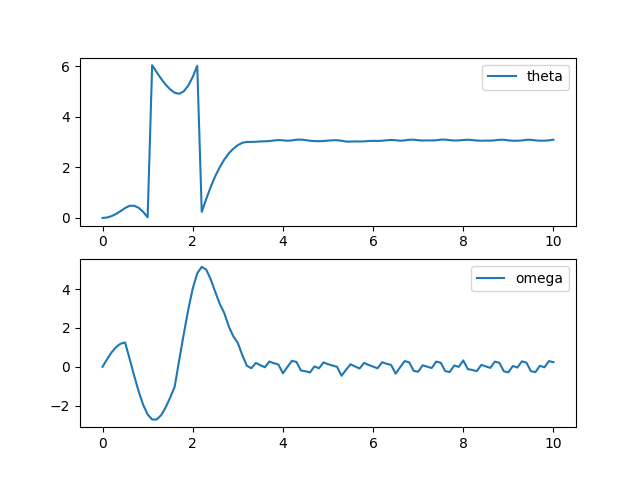

<IPython.core.display.Javascript object>


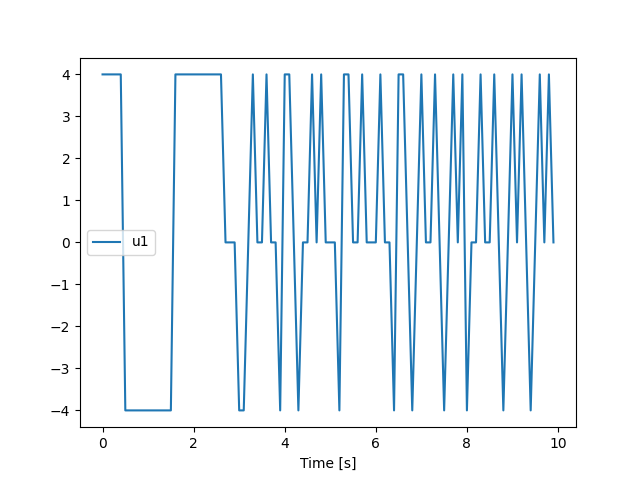

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAdzttZGF0AAACsAYF//+s
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSByMzAzME0gOGJkNmQyOCAtIEguMjY0L01Q
RUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFu
Lm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5h
bHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhl
ZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAg
ZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0x
MiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGlu
dGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMg
Yl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dv
cD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFf
cmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9
MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAA
AAzOZYiEAD///vdonwKbWkN6gOSVxSXbT4H/q2dwfI/pAwAAAwAAAwAAFbekZYZCdC/yYgAABXwA
sgZkmelxSROADzDHsnTdNPwqh0IYXPcgsx/VdOgPtpJk3xmz25oQD2NxIJATjjT7D2hHsJJZV59n
8tUzfVDTi7laQoNepwNygSCAo22Nk0DQ95+UMaCRVGKZr2OzZWIFMmAtBm3vYi2M0vuwvCUCzGRk
aEJ5ZsDvPJdE33RzWsjWPm0FZTE8sIZXFhYt8KOSPTlqQ6fzuaOvQ4fVQgAAOwKwCRnCiIbDjdWE
10mfuw6TofeelMW1/SR4hZtIQdZE2NNeG6Y1oVCmxdRSomUYAEOzAELxMIMhh9bjOJNsiZntjawh
H9Xrd441UqgwsPq+x/1ghcaF3QN/iyMC0CJRDeL1+W9gvs0B80Nn771qo1KvWjbtxLYmF7J7wEji
H5fq1cvZOIzNH0KM5Js+vOmsK6v9CT/8BxGeR8Veg+qICH6tiDxY2jTNsRL3T1YUNNCKLHbV/gU/
IaLXFE/3e6sqsjFYnIZrBIyX/hkr/SoKh/0K+MBaAlrR3IuV7vplJ9TWrroVjms8plr5X56dj/F7
Z6xn6mDvAAWWxNo0L5f272csTMwElqWqQSBn4LfY8O9lp752zksEjqv/eWS+bc7QIum+uCz0QBtj
wO3IieJEPIlhNh9rY2Ke8TAUk2bqr38gJwAAAwAAAwAAAwBa8ba7YuVnHJELNw197oAtAbVd69PS
7bV1zSMafJkrx5bMWRwYj/KxlqDLcTtSs8d8BKgzEkY15kYxOpvul0EAyUXU/0ADaLvjFmvtYDRD
g4XHgFvWf8oY8HvT+Sl4LVUXKPA+TG/bBe5JwPFyBSO3CrmpUfXF/gL8zbAt3M08Kg/E/tUFeLOR
EKARQj+zVOcjGQ+FMzZPSbzKyMhkGLnFFeOlGgVVNOqo2etPg1hhapwJ/OFjPPiIgssO8iATcBz/
5YHwYq6h0XdWpWurdZ5aITC8F9AiFlNH1809E21jPfzI3d3IwHfL7G0+ljPzIM3op/+icncKpRGF
wIW2fnRw0LjIuuFRbFKM3cs6DmvEFN5v6f4Tprpwl+3HxGi21mX2vFycSQIa/f2iqIh3Sxn5kIlF
nv7Z0JDdsK5PsZSBZnagJVC68vYBAAADAAADAAADAdd8KctCcHYftihI0e0go0tq8T7YBAHhF3YS
Q+UNsF7v3PP7bpey6igR7PmsHVLF8eJiz9hbb3fA8usnbu2xJWyA5XplCcOVZNENClL9Oqfp0Rno
hDiyel+Ui4RO17hTvpYE1TQ4FbwXxR86GMZjMY3b2loU5XObNAYG1z6j6aCsOaps3mIX5EgXoCKr
ewVkHdrzer6CXxfS9nNGzJ86MTE3L4rD3SaQhAh47bQk4mdyG/0jkkB4uDyWHrln4WXO0mrTmZyu
bzXPaJVPQRD8SflwuN16fFQmufn2+znfFcN+hwLd2JIPe/0PUzlDXC2/VdAY2EGHvhUWxuivniZN
4zL/lJrckX3IBztmzbkIw8m21tvI7uayVF/RPF2el0mTBq40drLzV/PnAIU9wtYEQv5HEz1VS0Jr
B2ycYLZHkKiXCYLBoEsUyApExef4Kwimr8aQE+ns0mQ1fXmfXnQgP1YaUrrEpLf8+PwOtpUSjjFA
cgGha0Qm5UTc+Mo/HoXcuRCqgpSDhv1+l7SlH2rfp5IDXZF7K32vMXel3/Vh7HYNdSEbFLb2/lP3
oOmpeMC1YaNlzNhAG1ATUPkylSzIzMw90xveAAPdQAURho2KvRkh2MTtADrVPkQr7Xmv40DoH9Qw
g1PiflDdm+gly8OS+mVrAmLJJYqf+f2mWbhraprCLSrgtpEA475XFTRu47kPu1r4kbeFfzjIalG9
Qf69RQT728uyoUE7It4V2URt7TCWpGUA2R7G0w+26dlYSF+fJaBJNhehBguDJ5J+A46TTkaFBEA8
JU/6hQJXP5M84n9orZFtFslMw9I7lG8r1G7OEyFxIe0Un+uH3F7JJ23uhiEIZ44+F71tbq6/sWLG
Eez/5IR9sD9j9l2VdjMtO2lcPS7n7kH+5v/vuuMkb0jUNbvbtwX/fEYunzYRow+f3JJLK5nw4EDd
PdqIJglLgH33xC3BwTmXF0n8gOprarRs2ayFwWfU//BhaQWcgHSvZuum9oJCd3mV8oIgw/Pw7aTO
vDRLNCSEgn2gvPdBYNJRhFo9kFP9o5KjtdI4v4OqCtSirFcuq3fjZxX/UByFudg4194O0YxYW/q9
WpAGcwKxaF2DtD0frEfQX2HeP4FSSgL4EcArDPeDLefxogexxwdxA5R1kPNGreeWPxRuAAvXLLH/
/cN1J+gACmd7vBMAAAMAyt0CJnYPV9Kc1IXhngvpUoeWQfwyqMDulXP8/Xq2qhcN1Z8VPHk2ejLo
tSQ7qDuaIFxvofKdA3zowaNhP2NTxM+6UwAvrCJ680jAZZF+RbwO/8KuEH3alnuPAF1mMO+HzsYg
9RHGPm/djZFqP5Oq4WubYFkxpBa7nLt4E5IEnK7vSNnXnOGq2PmWnPGiaDFmu4yYUyqTKxU26W+r
1QIDaQqoFJqMCob5Nlk6Dd1WxHnITpSVIFOb70c/jEbrUUZno9Ct6o4QpiJpG+fN+VPNmcy91U6I
5/1TUtDe3Rqds6F8+66dy9dy15/s5W/NjGQdnroeC7F1sCFJRWoLcJRJe6QvOVX1T5c9StBxsFxl
68NSaa/7/VkjnQ6t/m32mv9ARp8ibXQhLK2njveGE+GOYOjnjCgSN5Zws4eHjZ8xCLCfdSQA3URl
LeyytFDeF+nRV15KqDubUr7BgG/PZOLc9l3bMF2VNR+5pTuqTfEnOKiCnuMd6rJIcNtgxPmGALyz
SiY/GMufapOaCYi6/hY5x

In [5]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')
pendulum.animate_robot(x)


<IPython.core.display.Javascript object>


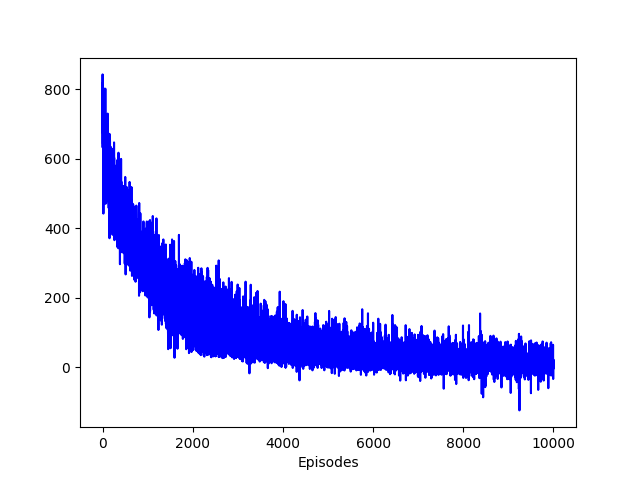

Text(0.5, 0, 'Episodes')

In [6]:
plt.figure()
#plt.subplot(4,1,4)
plt.plot(qp.costEpisode,color='blue')
plt.xlabel('Episodes')

<IPython.core.display.Javascript object>


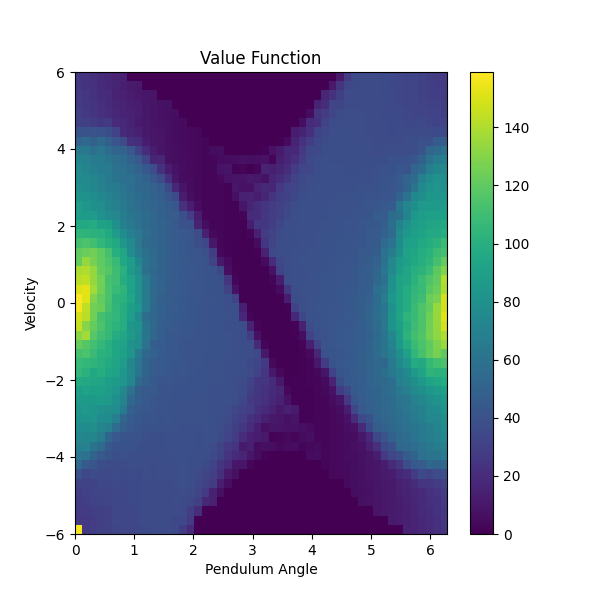

<IPython.core.display.Javascript object>


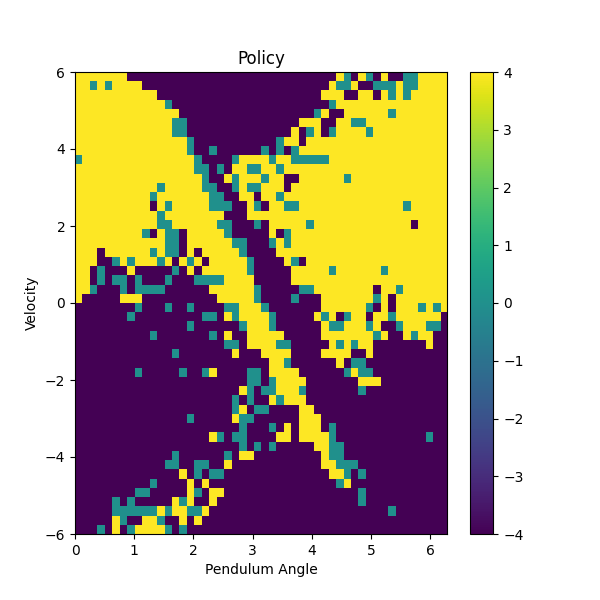

Text(0.5, 1.0, 'Policy')

In [7]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

value_function = np.zeros([50,50])
policy = np.zeros([50,50])


value_function,policy=qp.get_policy_and_value_function()
# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# Controls : [-5,0,5]

In [8]:
qp  = Pendulum([-5,0,5])
qp.episode()

In [9]:
T = 10.
x0 = np.array([0,0.])
t, x, u = pendulum.simulate(x0, qp.dummy_controller, T)

<IPython.core.display.Javascript object>


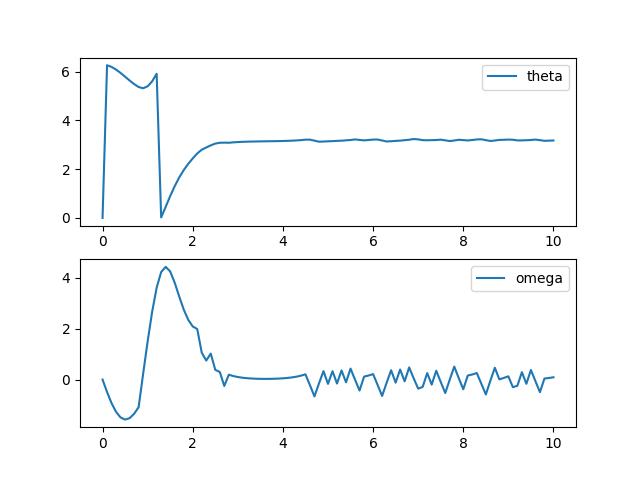

<IPython.core.display.Javascript object>


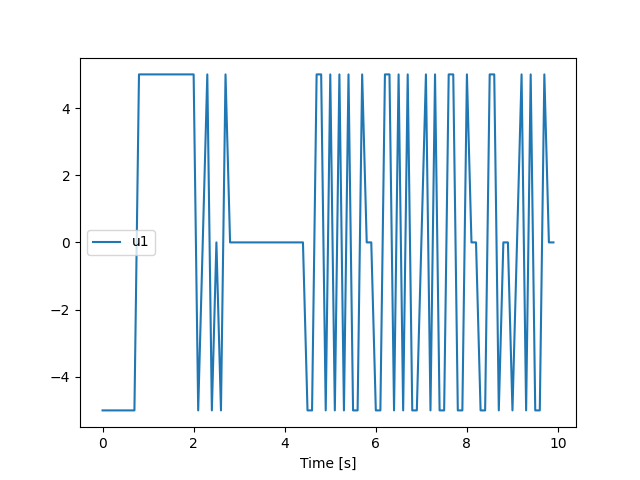

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAd1xtZGF0AAACsAYF//+s
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSByMzAzME0gOGJkNmQyOCAtIEguMjY0L01Q
RUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFu
Lm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5h
bHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhl
ZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAg
ZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0x
MiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGlu
dGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMg
Yl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dv
cD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFf
cmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9
MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAA
AAzvZYiEAD///vdonwKbWkN6gOSVxSXbT4H/q2dwfI/pAwAAAwAAAwAAFbekZYZCdC/yYgAABXwA
sgZkmelxSROADzDHsnTdNPwqh0IYXPcgsx/VdOgPtpJk3xmz25oQD2NxIJATjjT7D2hHsJJZV59n
8tUzfVDTi7laQoNepwNygSCAo22Nk0DQ95+UMaCRVGKZr2OzZWIFMmAtBm3vYi2M0vuwvCUCzGRk
aEJ5ZsDvPJdE33RzWsjWPm0FZTE8sIZXFhYt8KOSPTlqQ6fzuaOvQ4fVQgAAOwKwCRnCiIbDjdWE
10mfuw6TofeelMW1/SR4hZtIQdZE2NNeG6Y1oVCmxdRSomUYAEOzAELxMIMhh9bjOJNsiZntjawh
H9Xrd441UqgwsPq+x/1ghcaF3QN/iyMC0CJRDeL1+W9gvs0B80Nn771qo1KvWjbtxLYmF7J7wEji
H5fq1cvZOIzNH0KM5Js+vOmsK6v9CT/8BxGeR8Veg+qICH6tiDxY2jTNsRL3T1YUNNCKLHbV/gU/
IaLXFE/3e6sqsjFYnIZrBIyX/hkr/SoKh/0K+MBaAlrR3IuV7vplJ9TWrroVjms8plr5X56dj/F7
Z6xn6mDvAAWWxNo0L5f272csTMwElqWqQSBn4LfY8O9lp752zksEjqv/eWS+bc7QIum+uCz0QBtj
wO3IieJEPIkvNh9qTeVo+JnAVAs35DuQE4AAAAMAAAMAAC14212xcrOOSIWbhr73QBaA2q716el2
2rrmkY0+TJXjy2YsjgxH+VjLUGW4nalZ474CVBmJIxrzIxidTfdLoIBkoup/oAG0XfGLNfawGiHB
wuPALes/5Qx4Pen8lLwWqouUeB8mN+2C9yTgeLkCkduFXNSo+uL/AX5m2BbuZp4VB+J/aoK8WciI
UAihH9mqc5GMh8KZmyek3mVkZDIMXOKK8dKNAqqadVRs9afBrDC1TgT+cLGefERBZYd5EAm4Dn/y
wPgxV1Dou6tStdW6zy0QmF4L6BELKaPr5p6JtrGe/mRu7uRgO+X2Np9LGfmQZvRT/9E5O4VSiMLg
Qu4DkI2a3u92NuC/BlcdNvHBcXaglUQOtQ4KhQl+3HxGi0V8F0esKSrlwiwfEMKjuljPzIRKLPf7
lfauPJAZoGW80R/vtP6VuOXzLgAAAwAAAwAABeGF5CyZYWEhj9BOBltxNd4ci6Xsjt5Teq/9xn8w
irnq4FIkG9dKkGRX0BCHWTG93Wmh2SC+LuiYn/HW2xhFMvqW6hTu7ztyS8EYZCCfYpty5+NmIqON
QnT6WJrbJcW8UIq7dQqiE33XpOg21K2kh56xwXz9YdVnuHbuRu8+aCLu6UNoJfq1a0v7qxNbEEsr
0W4o2F6JoMKm21+5YuxGGP72MlUzBb/rOzw4LquTp7F3M39zh/wushf48phWMMfp+FlztgiaOfEj
T3WR2gHtUnq187dnH026jr+30P0SZBaigQkYgqVNPZ92Q1x94YNO7M5VxTHWILioABSf8clwG4uZ
4LzAoWs4ndqCHaqk4jekGplLkxXgglo0BpTpb/rTospDV6ldxWP5K+K5yIB2WVwWnO8PbRUZ7KFE
lw8lTm6zApxLFMdhcDRHnEU+Pd+eYi63ueo+ktmaniA6qJKEFlqo//SjXFfFOb4fB45MbJHZUG0q
CJTQSRp5Betp17c7q/2j75gnm7AaUBZKNlB+EWHK1xnpgaZsGp/28e/kUaU3HgeJdxIvxQf8jy2o
titdQYpgFR09P28PBzxcdtbgbPe7kI1ih7EngfFp3f/aoj5RC5S5k7iq/r7Xmv5F2guP/qv+e13+
0XCVCfF6X1lF4NA99i7+X/WmWbhraprCLSrqnq6g73yuKmjdx6ka52UGw28K/nGQ0mTKYsls9EnW
63NVaoJzRbwrsojb2hiPPglZoC8dnIsUXKhe84iAb8L5OG0IMYNObTsrA1BxIdS5FDJxo+jGLHLs
K9KAAn3pBnhAnz5hg+SrC1kPqveL1UTp1u9E+ZvciTL8nbe6GIhOxKi68mxC7WjD7UZYXTb/u0kZ
Mucn7Lsq7GZU3NK4el3P3IOEzf/fdcZI3pGoa3gJsNq4JO4H7pm4lX8MF6KGVzPUXgN4fo1Up00X
KkRi9Tmw1CaZda/DN1sU+tqtGzZrIXBP+R/poMfrBF/6+ex3DDtXd3utb03SK4tY5+HbSZ14Z3bY
g8mzbnWnHnCxg7u+swZ/7Ua4/FV45/9EkwivVV3gHH8km5IXJc/qLEIfQfGz1gt9VwgNfWmCmuJx
YuRUzZUFjUSHiTja5LHUQcQZvqTU7rYcnarrJQ2gshzwDM2VphfFvUOMvVQc2JK9d+rXa3wbG/dF
ikj9IcDGTXCf86TAFXAAZyMaXdLiKQWfdvONVWqUhl8H1OLhpaP1BaGJOb74/x2ypUkQDxQPZdNn
jx70CyDwOetgt+04agoteVYaYWjZGB+lzGrqlEVZ1QKzIMrYkrG+V9qj9A2554qb36jtvZv/oNPx
A9DQC0OU08WykvEMDLemlZngBBzLJQPoQhVPY2JIl/HIKc6ty9+UCXwiwOXeZgkBZas5Ih40dpAa
NhVIucvSWkU65kKlr9UarY+clLj1YJZKnm7QlQOd2g7cBekHgu4J0rUau6yGCZ6zr5ab2dJxatc9
QVAfy3qcn36h/GI3WoozPrqxyRvj+LQyeU/p0ttZisrkwzxIhRpv1dICYQRfDoKpkvp2x43AT+gP
+bDvI3Aiu16D0kIT8VxzbtCBKN1zxEhfGoFumwaozM6GfpZ5M8k9TkMxrOW7/5t+Ur0/261YAKK1
qrNt+W6QhO5EoMKBnfTUiiz32BrUdVNxp5vXTj2TKw/j3BxYA+itAeuY9f4/nlPcFxaMasYeR6Hj
kE3m3IZ48wyTCgzf9RF4f

In [10]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')
pendulum.animate_robot(x)

<IPython.core.display.Javascript object>


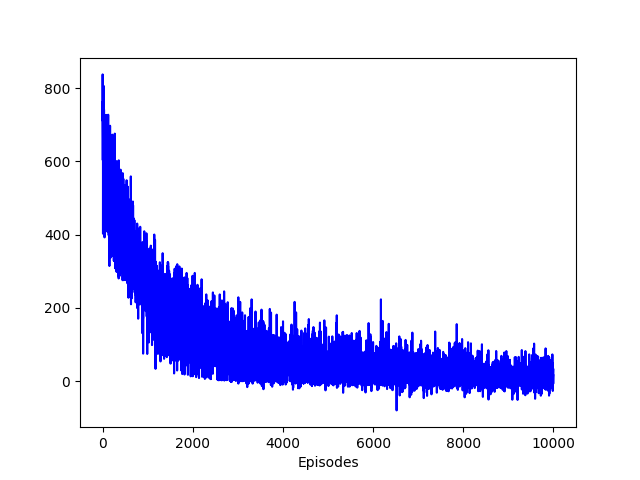

Text(0.5, 0, 'Episodes')

In [11]:
plt.figure()
plt.plot(qp.costEpisode,color='blue')
plt.xlabel('Episodes')

<IPython.core.display.Javascript object>


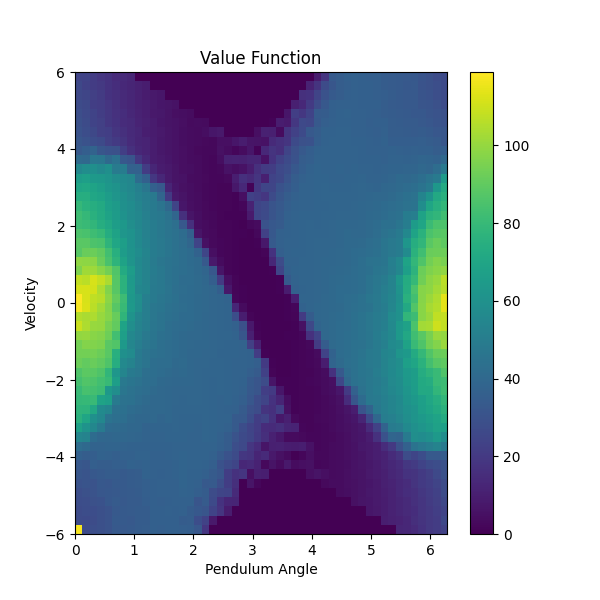

<IPython.core.display.Javascript object>


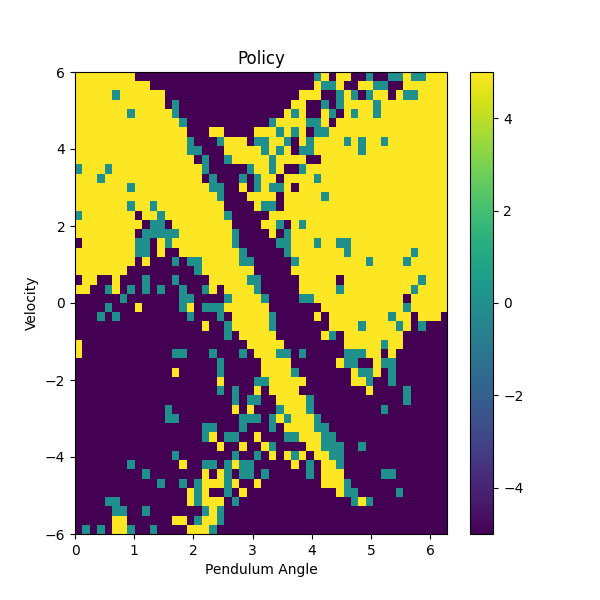

Text(0.5, 1.0, 'Policy')

In [12]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

value_function = np.zeros([50,50])
policy = np.zeros([50,50])


value_function,policy=qp.get_policy_and_value_function()
# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# Changing the Eta and Step Value

In [13]:
qp  = Pendulum([-5,0,5])

#Changing eta value to 0.5
qp.eta = 0.5

qp.episode()

In [14]:
T = 10.
x0 = np.array([0,0.])
t, x, u = pendulum.simulate(x0, qp.dummy_controller, T)

<IPython.core.display.Javascript object>


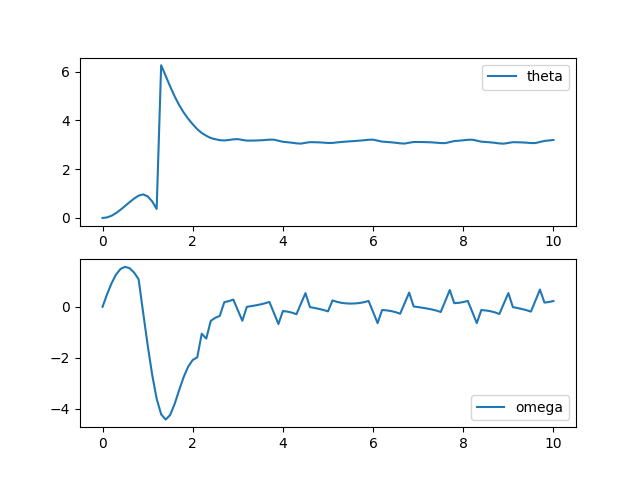

<IPython.core.display.Javascript object>


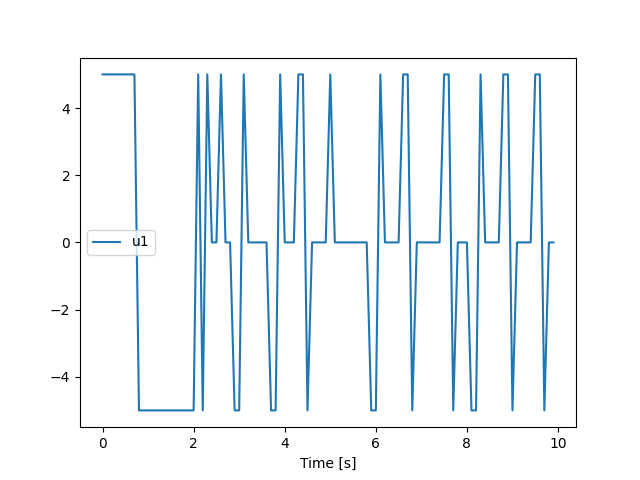

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAffZtZGF0AAACsAYF//+s
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSByMzAzME0gOGJkNmQyOCAtIEguMjY0L01Q
RUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFu
Lm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5h
bHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhl
ZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAg
ZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0x
MiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGlu
dGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMg
Yl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dv
cD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFf
cmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9
MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAA
AA0gZYiEABD//veBvzLLXyK6yXH5530srM885DxyXYmuuNAAAAMAAAMAAUeHteuN3YNbSdAAABrA
A6Qix/9vpDjcAE/ZYPzWIy/xaAfWoiuIxPmK2D7zN1SWOL4zZ8ixj9mJWyafzaQSVKwXTGFIcq8+
z+WqZvqBpOG1GxxUeRc8iPWowT5bGx6Doe8/KStBIqjFM17HZ0rjyqTAWhXb3sRbGaX3YXiJHkfZ
3NCE8s2B3nkuicD45rVdrHzaKs3pFyE2yeGYdY75fZ9PIcL6+1DtNo159DsIedHWW5BeeoUeMInA
ry0cKRC8DvHDfF9TCartIBBLMYSLOkz92HSdD7mvSTdmcFN9GcFT2B/gDsnAFBf2/aRZPeVxV0cQ
qjydAFazb0pAisSXNg5xqtt8tZxgWddu8caqVP4mQyWoBb4LjQu6Bv8WRgWARKIbxevy3sF9mgPm
hy/fetVGpfWmqp4iX/fcmGS22uU/dfHwboSkZ0MdvzhNn1501hXV/oS3/gOLYSlNWAxzNnkHyQg8
WNo0zbES+kiRCnTQgix21f4FPyGkvLtuz2b+iW4BNTkM1gkZL/wyhJovT2MkK+Jk0axfEEWSSiTH
7hzm/SxzoncYZIn5BZ6A3xe2esZ+pg7wAFlsTZOi+X9u9nLEzMBtt4zEEgZ+C32PDnZae+ds5LBI
6r/3k2snwp8XCTc9fCQ6IpTS+KwBg5LNdexQN3cqX+P1IvAPS9Jou9WYQaBd846ViD6V+k+hXIQ9
fBoEVSsMVEI4x21Bkdk1rNWnwQT7PuGOxZqW9+HjeEbd0ubkzLXiSqHtOU0pnlsldstCEj0Bmwbf
xO1F5+V8BKgzH8TNOZGMTqb7pdBAMfWWH+ORJdd8Ys1ODCJB+go3FPoc8olu2Sgm41xcBpGfPrRT
yj8aVOpN2l4uNR6psa3Wwvm1f3/5qyQLdzNPCoPxP66hPizkRCgEUIpNywyHLxFuPGbJvFdNTbDA
mngxRV91waNkkbCMOlA9zId8IH1BvdfGOP5anez3U/fFmKc/+WB8GKnZ41YSUSzu29zQe8btJePE
LKaPr5p6Jtq9+avYDTdgwUb5medxi+dFsQc+e/+ickLbrcCPXx+ZFK9HhpJGxdbj52KUZu5ZARgu
YlQakuXwIB8xloLN/2OylVC3bDTD+SXtZol0jm7BbKBotiaDUN+me9gKSIHNPa1Wx8Z2gCf9AA/a
KD3SF6vXOKBHzG8+mgYqyXAZB+51SftTZ88WEPuH+zV2LtAUaW1eJ9r9at1rdsJIfKG2C937ntYV
sNmsaTwqyVQmCuJ3YzZuvt9dLojXqd7MsLljL4yDlemUJw5Vk0Q0IvK9TkWNza6Zd2P8okXvcm2W
00iUlQQPqmhwK3gvhWwNtZ1wmfO3tLQpyuc2aAytrn1H00FYc1TZvMOfuZy3QNsJHmLUrYLjgSjE
Mcx9styLgHjqERxBCJOVL2anR1Ido9sfwODKlYn9jA8twYLDpVG1Vq891fOIl9d82vrBHx2kk6KT
LzNW+NFfBWt1Uly9ysGnYR8aSUzNcyJ8/hJoXamwk4JSn/WbcsbFKWJn/dCwACGIzgtG+VroUcal
HFaO0Uf7dNq0RLOM3HjVolaebwa6rJHVtjfKMtQOni3/wIneuW3zwC40WumYU0v8b+QqJcJgsGgE
pgnN/qVMTBFPy7fn+vuOGpSzYANSRcbfX63koIwWKs71j/6XHx/rCU2pEa23GR3WdvO/Tckjrx9q
kJNYlv9zON2S2qsrt7fqgAk91PVicscCSY3Rxbz1MUll7f+fJTif8sKlATiAsVwSm58RMOCx3lsn
DLVAMnmUaAEJrApdOYx9Pa1nowYBuLyVMfmZnPbzRiW9nLda8dKWHCiqIwtEr59eMPDf9AJw+jbW
Yz7GEo0Fe1Mq6RIGtg0Idewn9MzwHnuqStXVpk6rOjmtFtMReA5ySeyufkaM7W1iY8dfALZ8IcIC
rK7UsFSkOv5kjFxaH1EMfYXbiAB7TXY31KVjfvWsMr7T0bnu0//s4+f2LMg/3tVWPObSsuGW9ee6
6SFQyk1DXtQEFZX/GMS56loLPiz+Yl2/fYbwCZofk55V5t9gxszdZvutqDcC0zbKOmR6oIFAQpkn
enrYQ/j6VaMI29ss0hfmeqsMwA5t25On9X0t/n11+5h3CjY6K5hjCt0/FepWYi9bTih8oegFeIdG
LtUmV19W3bZtXUwNd+cpHa6LewfriQIRdi/akcEs6eDeCVy8P7TilVALMglPQG3vslWv52PP7jRy
lmOurLR0mddwHQqUZscJAZM4eZaX639FZrtRrzMS7OX5NuKxzfGMULUm9fW7uPsENfkoUMov9e1a
B7yGSBXJZRLGBVB/Zu7Klxnq9LRM42fN+egxPwdkrlmgfQGi/FFTm76jkQOHVP1fKj9ZAAYuUP8D
H3YIsr1ZJBeVvgAQprAd4AAAAwAAAwAAAwAENAueVn/4BqpZPH/WRexL8o3rcvskXIDEP68jgxmN
pYWe8mPU8ahFbNxnrMzWZfzVF3p63SHl7ZLoYfKAp189JUXofwdcaB+B3AJWhnelJmxZY8+GO48G
Oqlo3B0HfgV02l86G43yok5JwWv4Fs/CoMtO6fegvusaPS9Dggk4CdXRk5tQDzDTltuE9M5nm4a5
ugO3ziTKU2oro7RuyBh+ndp5oNXdZDBM+1SdtN1Ok4tqDo/7uV9qKjT/1D+MRutRRmfpRjkjfH8W
hk8qDQaekH771C/PEiFGm/V0gAxaZ9icKHPa8268vXegM/7gX/ziFQjK54L/T1ta8yVsS5/y54iQ
vjUC+UZfVmqpmhwWGbdnYPbL5FhDy/60xEEVKrktDSc/3362ZBiHJVOFItS71bUtWp93HGA3YKH9
WHmWdWpEH4JCJRRR6kPAO

In [15]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')
pendulum.animate_robot(x)

<IPython.core.display.Javascript object>


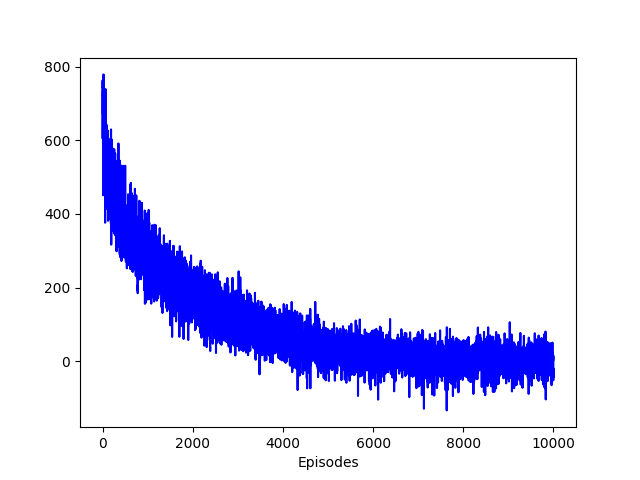

Text(0.5, 0, 'Episodes')

In [16]:
plt.figure()
plt.plot(qp.costEpisode,color='blue')
plt.xlabel('Episodes')

<IPython.core.display.Javascript object>


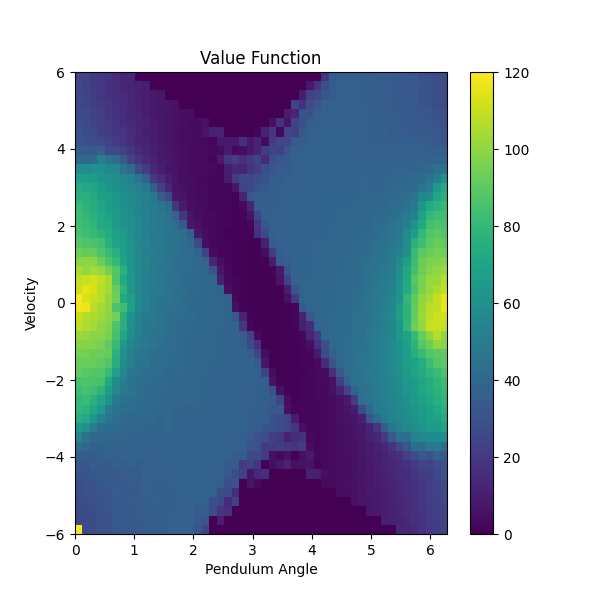

<IPython.core.display.Javascript object>


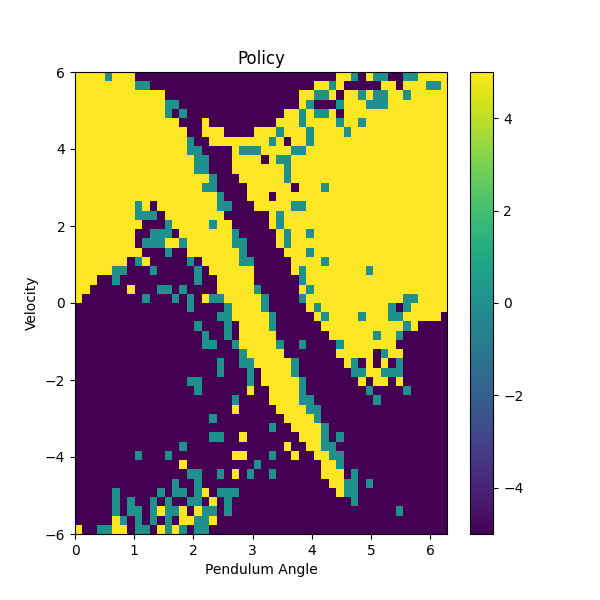

Text(0.5, 1.0, 'Policy')

In [17]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

value_function = np.zeros([50,50])
policy = np.zeros([50,50])


value_function,policy=qp.get_policy_and_value_function()
# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

In [18]:
qp  = Pendulum([-5,0,5])

#Changing stepsize value to 0.1
qp.stepSize = 0.1

qp.episode()

In [19]:
T = 10.
x0 = np.array([0,0.])
t, x, u = pendulum.simulate(x0, qp.dummy_controller, T)

<IPython.core.display.Javascript object>


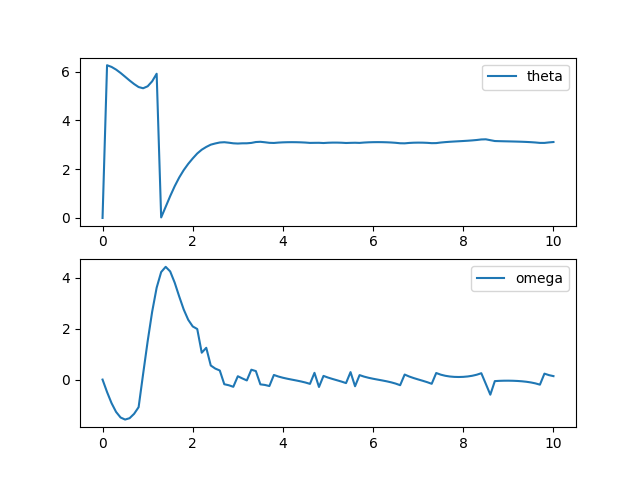

<IPython.core.display.Javascript object>


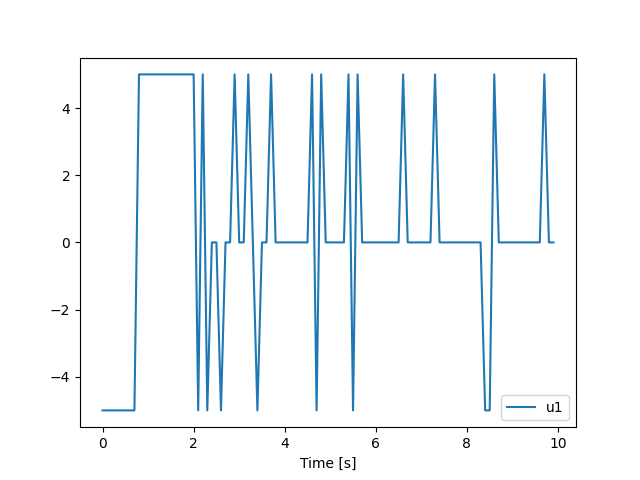

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAd2dtZGF0AAACsAYF//+s
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSByMzAzME0gOGJkNmQyOCAtIEguMjY0L01Q
RUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFu
Lm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5h
bHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhl
ZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAg
ZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0x
MiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGlu
dGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMg
Yl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dv
cD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFf
cmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9
MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAA
AAzvZYiEAD///vdonwKbWkN6gOSVxSXbT4H/q2dwfI/pAwAAAwAAAwAAFbekZYZCdC/yYgAABXwA
sgZkmelxSROADzDHsnTdNPwqh0IYXPcgsx/VdOgPtpJk3xmz25oQD2NxIJATjjT7D2hHsJJZV59n
8tUzfVDTi7laQoNepwNygSCAo22Nk0DQ95+UMaCRVGKZr2OzZWIFMmAtBm3vYi2M0vuwvCUCzGRk
aEJ5ZsDvPJdE33RzWsjWPm0FZTE8sIZXFhYt8KOSPTlqQ6fzuaOvQ4fVQgAAOwKwCRnCiIbDjdWE
10mfuw6TofeelMW1/SR4hZtIQdZE2NNeG6Y1oVCmxdRSomUYAEOzAELxMIMhh9bjOJNsiZntjawh
H9Xrd441UqgwsPq+x/1ghcaF3QN/iyMC0CJRDeL1+W9gvs0B80Nn771qo1KvWjbtxLYmF7J7wEji
H5fq1cvZOIzNH0KM5Js+vOmsK6v9CT/8BxGeR8Veg+qICH6tiDxY2jTNsRL3T1YUNNCKLHbV/gU/
IaLXFE/3e6sqsjFYnIZrBIyX/hkr/SoKh/0K+MBaAlrR3IuV7vplJ9TWrroVjms8plr5X56dj/F7
Z6xn6mDvAAWWxNo0L5f272csTMwElqWqQSBn4LfY8O9lp752zksEjqv/eWS+bc7QIum+uCz0QBtj
wO3IieJEPIkvNh9qTeVo+JnAVAs35DuQE4AAAAMAAAMAAC14212xcrOOSIWbhr73QBaA2q716el2
2rrmkY0+TJXjy2YsjgxH+VjLUGW4nalZ474CVBmJIxrzIxidTfdLoIBkoup/oAG0XfGLNfawGiHB
wuPALes/5Qx4Pen8lLwWqouUeB8mN+2C9yTgeLkCkduFXNSo+uL/AX5m2BbuZp4VB+J/aoK8WciI
UAihH9mqc5GMh8KZmyek3mVkZDIMXOKK8dKNAqqadVRs9afBrDC1TgT+cLGefERBZYd5EAm4Dn/y
wPgxV1Dou6tStdW6zy0QmF4L6BELKaPr5p6JtrGe/mRu7uRgO+X2Np9LGfmQZvRT/9E5O4VSiMLg
Qu4DkI2a3u92NuC/BlcdNvHBcXaglUQOtQ4KhQl+3HxGi0V8F0esKSrlwiwfEMKjuljPzIRKLPf7
lfauPJAZoGW80R/vtP6VuOXzLgAAAwAAAwAABeGF5CyZYWEhj9BOBltxNd4ci6Xsjt5Teq/9xn8w
irnq4FIkG9dKkGRX0BCHWTG93Wmh2SC+LuiYn/HW2xhFMvqW6hTu7ztyS8EYZCCfYpty5+NmIqON
QnT6WJrbJcW8UIq7dQqiE33XpOg21K2kh56xwXz9YdVnuHbuRu8+aCLu6UNoJfq1a0v7qxNbEEsr
0W4o2F6JoMKm21+5YuxGGP72MlUzBb/rOzw4LquTp7F3M39zh/wushf48phWMMfp+FlztgiaOfEj
T3WR2gHtUnq187dnH026jr+30P0SZBaigQkYgqVNPZ92Q1x94YNO7M5VxTHWILioABSf8clwG4uZ
4LzAoWs4ndqCHaqk4jekGplLkxXgglo0BpTpb/rTospDV6ldxWP5K+K5yIB2WVwWnO8PbRUZ7KFE
lw8lTm6zApxLFMdhcDRHnEU+Pd+eYi63ueo+ktmaniA6qJKEFlqo//SjXFfFOb4fB45MbJHZUG0q
CJTQSRp5Betp17c7q/2j75gnm7AaUBZKNlB+EWHK1xnpgaZsGp/28e/kUaU3HgeJdxIvxQf8jy2o
titdQYpgFR09P28PBzxcdtbgbPe7kI1ih7EngfFp3f/aoj5RC5S5k7iq/r7Xmv5F2guP/qv+e13+
0XCVCfF6X1lF4NA99i7+X/WmWbhraprCLSrqnq6g73yuKmjdx6ka52UGw28K/nGQ0mTKYsls9EnW
63NVaoJzRbwrsojb2hiPPglZoC8dnIsUXKhe84iAb8L5OG0IMYNObTsrA1BxIdS5FDJxo+jGLHLs
K9KAAn3pBnhAnz5hg+SrC1kPqveL1UTp1u9E+ZvciTL8nbe6GIhOxKi68mxC7WjD7UZYXTb/u0kZ
Mucn7Lsq7GZU3NK4el3P3IOEzf/fdcZI3pGoa3gJsNq4JO4H7pm4lX8MF6KGVzPUXgN4fo1Up00X
KkRi9Tmw1CaZda/DN1sU+tqtGzZrIXBP+R/poMfrBF/6+ex3DDtXd3utb03SK4tY5+HbSZ14Z3bY
g8mzbnWnHnCxg7u+swZ/7Ua4/FV45/9EkwivVV3gHH8km5IXJc/qLEIfQfGz1gt9VwgNfWmCmuJx
YuRUzZUFjUSHiTja5LHUQcQZvqTU7rYcnarrJQ2gshzwDM2VphfFvUOMvVQc2JK9d+rXa3wbG/dF
ikj9IcDGTXCf86TAFXAAZyMaXdLiKQWfdvONVWqUhl8H1OLhpaP1BaGJOb74/x2ypUkQDxQPZdNn
jx70CyDwOetgt+04agoteVYaYWjZGB+lzGrqlEVZ1QKzIMrYkrG+V9qj9A2554qb36jtvZv/oNPx
A9DQC0OU08WykvEMDLemlZngBBzLJQPoQhVPY2JIl/HIKc6ty9+UCXwiwOXeZgkBZas5Ih40dpAa
NhVIucvSWkU65kKlr9UarY+clLj1YJZKnm7QlQOd2g7cBekHgu4J0rUau6yGCZ6zr5ab2dJxatc9
QVAfy3qcn36h/GI3WoozPrqxyRvj+LQyeU/p0ttZisrkwzxIhRpv1dICYQRfDoKpkvp2x43AT+gP
+bDvI3Aiu16D0kIT8VxzbtCBKN1zxEhfGoFumwaozM6GfpZ5M8k9TkMxrOW7/5t+Ur0/261YAKK1
qrNt+W6QhO5EoMKBnfTUiiz32BrUdVNxp5vXTj2TKw/j3BxYA+itAeuY9f4/nlPcFxaMasYeR6Hj
kE3m3IZ48wyTCgzf9RF4f

In [20]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')
pendulum.animate_robot(x)

<IPython.core.display.Javascript object>


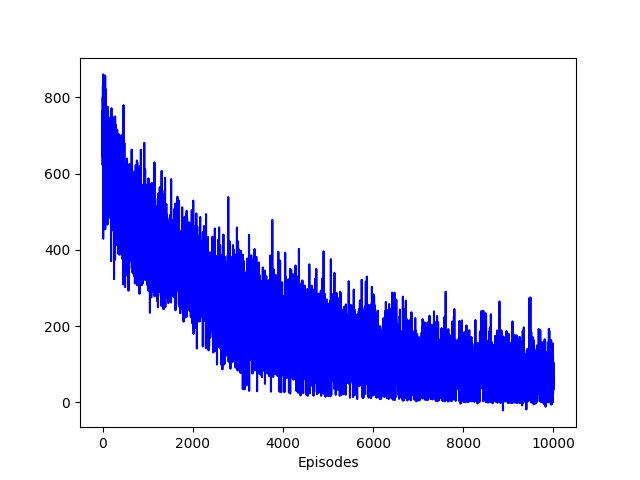

Text(0.5, 0, 'Episodes')

In [21]:
plt.figure()
plt.plot(qp.costEpisode,color='blue')
plt.xlabel('Episodes')

<IPython.core.display.Javascript object>


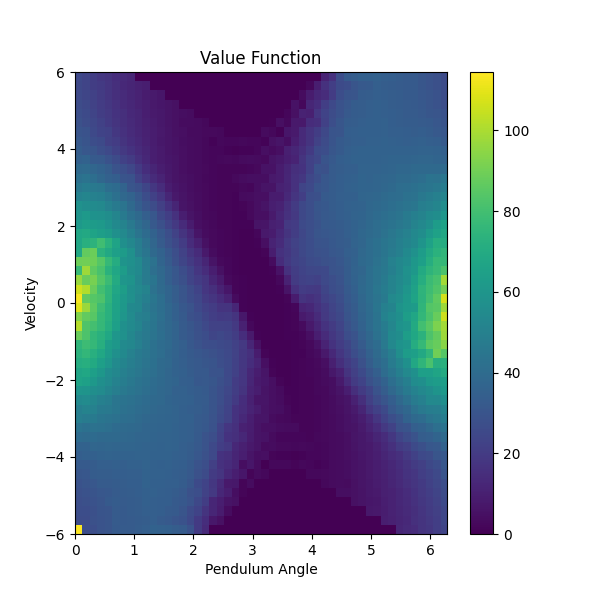

<IPython.core.display.Javascript object>


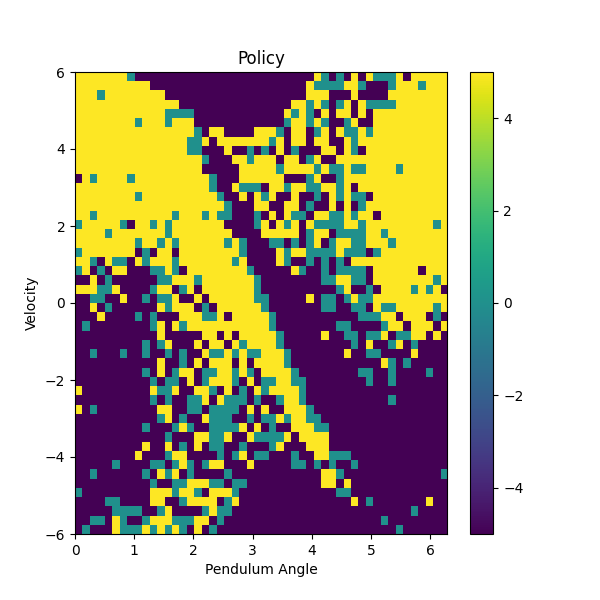

Text(0.5, 1.0, 'Policy')

In [22]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

value_function = np.zeros([50,50])
policy = np.zeros([50,50])


value_function,policy=qp.get_policy_and_value_function()
# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy.T[::-1], extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.colorbar()
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')